In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [4]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
gender=pd.get_dummies(X['Gender'],drop_first=True,dtype=int)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [6]:
geography=pd.get_dummies(X['Geography'],drop_first=True,dtype=int)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [7]:
X=pd.concat([X,geography,gender],axis=1)
X=X.drop(['Geography','Gender'],axis=1)

In [8]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [12]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [13]:
model=Sequential()

In [14]:
#frist hidden layer
model.add(Dense(6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [15]:
#second hidden layer
model.add(Dense(6,kernel_initializer='he_uniform',activation='relu'))
#output layer
model.add(Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [16]:
model.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
model_history = model.fit(X_train_std, y_train, validation_split=0.33, batch_size = 10, epochs = 10)

Epoch 1/10


536/536 [==============================] - 3s 4ms/step - loss: 0.8295 - accuracy: 0.5051 - val_loss: 0.6168 - val_accuracy: 0.6914
Epoch 2/10
536/536 [==============================] - 2s 4ms/step - loss: 0.5689 - accuracy: 0.7451 - val_loss: 0.5288 - val_accuracy: 0.7868
Epoch 3/10
536/536 [==============================] - 2s 4ms/step - loss: 0.5237 - accuracy: 0.7903 - val_loss: 0.5015 - val_accuracy: 0.7986
Epoch 4/10
536/536 [==============================] - 2s 4ms/step - loss: 0.5032 - accuracy: 0.7927 - val_loss: 0.4860 - val_accuracy: 0.7986
Epoch 5/10
536/536 [==============================] - 2s 4ms/step - loss: 0.4888 - accuracy: 0.7927 - val_loss: 0.4742 - val_accuracy: 0.8001
Epoch 6/10
536/536 [==============================] - 2s 4ms/step - loss: 0.4766 - accuracy: 0.7927 - val_loss: 0.4641 - val_accuracy: 0.8039
Epoch 7/10
536/536 [==============================] - 2s 4ms/step - loss: 0.4655 - accuracy: 0.7947 - val_loss: 0.4540 - val_accuracy: 0.8099
Epoc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


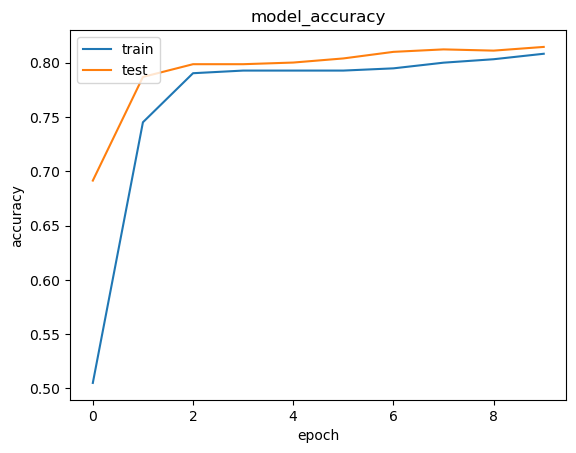

In [19]:
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

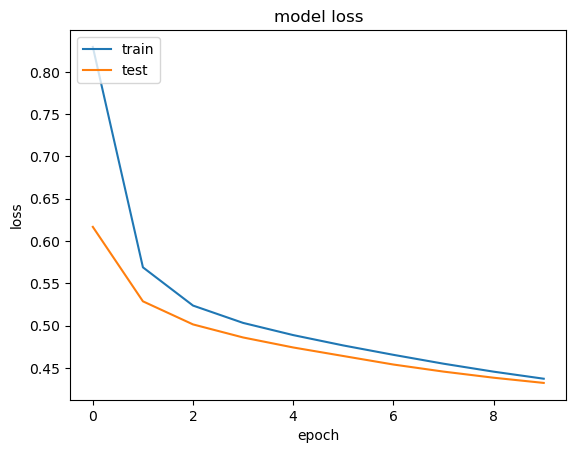

In [20]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
loss,accuracy = model.evaluate(X_test_std,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.8115


In [24]:
print(accuracy)

0.8115000128746033


In [25]:
print(loss)

0.4267198145389557
